#### Reasons why Vanilla Gradient Descent is often insufficient for Deep Learning:

1.  **Learning Rate Sensitivity**:
    Vanilla Gradient Descent uses a fixed learning rate for all parameters. If the rate is too small, convergence is painfully slow; if too large, the loss function fluctuates or diverges. It lacks the ability to adapt the step size based on the current gradient landscape.

2.  **Getting Stuck in Local Minima**:
    In non-convex loss landscapes common in deep neural networks, the algorithm can easily get trapped in suboptimal local minima. Since it blindly follows the steepest descent, it has no mechanism (like momentum) to gain enough velocity to escape these shallow valleys.

3.  **Saddle Points**:
    Saddle points are areas where the gradient is zero but are not optimal (one dimension slopes up, another slopes down). Vanilla GD struggles here because the gradient is near zero in all directions, causing learning to stall almost completely, unlike advanced optimizers that can navigate these plateaus.

#### Exponentially weighted moving average

This method solves the above three problems by giving more weight to recent data points while still considering older data but with exponentially decreasing influence. It smooths out short-term fluctuations and highlights longer-term trends or cycles.

Formula:
$$V_t = \beta V_{t-1} + (1-\beta) \theta_t$$

Where:
- $V_t$ is the current average
- $V_{t-1}$ is the previous average
- $\theta_t$ is the current data point
- $\beta$ is the hyperparameter (weight) between 0 and 1

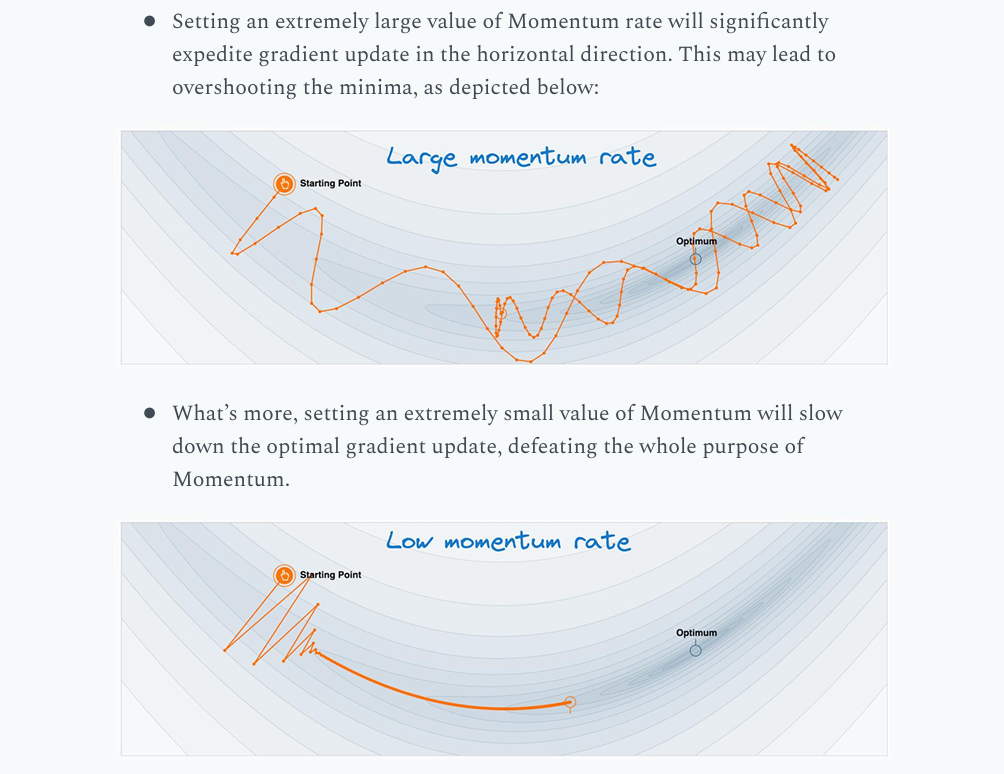

[Visualization tool](https://bit.ly/4cOrJN1)

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Input, Dense

In [2]:
# Creating Dataset
X, y = make_classification(
    n_samples = 1000,
    n_features = 2, # 2 features
    n_informative = 2,
    n_redundant = 0,
    n_classes = 3,
    n_clusters_per_class = 1
)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, keras.utils.to_categorical(y), test_size=0.2, random_state=42)

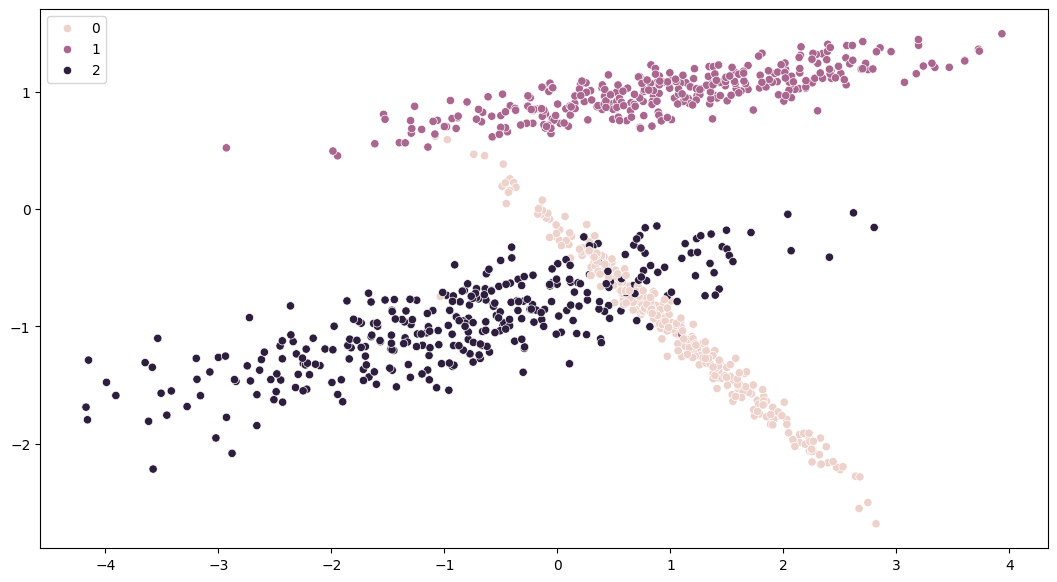

In [3]:
# Plotting
plt.figure(figsize=(13, 7))
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = y)
plt.show()

In [19]:
# Building Neural Network Architecture
model = Sequential([
    Input(shape = (2,)),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

*Deep learning loss functions often involve non-convex optimization, which presents several challenges:*
1. High curvature
2. Inconsistent gradients
3. Noisy gradients

*One effective method to mitigate these issues is the use of exponentially weighted moving averages.*

#### SGD with momentum
Stochastic Gradient Descent (SGD) with momentum is an optimization algorithm that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the past time step to the current update vector.

Here's how it works:

1.  **Compute the exponentially weighted average of past gradients ($v_t$)**: This step accumulates the gradients over time, giving more weight to recent gradients.
    *   $v_t$: The momentum vector at time $t$.
    *   $\beta$: To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter β, called the momentum, which must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9.
    *   $v_{t-1}$: The momentum vector from the previous time step.
    *   $\nabla J(\theta)$: The gradient of the loss function $J$ with respect to the parameters $\theta$ at the current time step.
    *   $(1 - \beta) \nabla J(\theta)$: The current gradient scaled by $(1 - \beta)$.

2.  **Update the parameters ($\theta$)**: The parameters are updated using the learning rate multiplied by the momentum vector, rather than just the current gradient.
    *   $\theta$: The model parameters.
    *   $\alpha$: The learning rate, which determines the step size.

$$
\begin{aligned}
v_t &= \beta v_{t-1} + (1 - \beta) \nabla J(\theta) \\
\theta &= \theta - \alpha v_t
\end{aligned}
$$

In [20]:
# Compiling the model with `Momentum SGD` optimizer
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

*You can verify that if the gradient remains constant, the terminal velocity (i.e., the maximum size of the weight updates) is equal to that gradient multiplied by the learning rate η multiplied by 1 / (1 – β) (ignoring the sign). For example, if β = 0.9, then the terminal velocity is equal to 10 times the gradient times the learning rate, so momentum optimization ends up going 10 times faster than gradient descent! This allows momentum optimization to escape from plateaus much faster than gradient descent.*

In [21]:
# Training the model
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4175 - loss: 1.0575 - val_accuracy: 0.4900 - val_loss: 0.9778
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5113 - loss: 0.9634 - val_accuracy: 0.5650 - val_loss: 0.9078
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5562 - loss: 0.9043 - val_accuracy: 0.6000 - val_loss: 0.8591
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5700 - loss: 0.8598 - val_accuracy: 0.6150 - val_loss: 0.8181
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5938 - loss: 0.8188 - val_accuracy: 0.6600 - val_loss: 0.7804
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6913 - loss: 0.7793 - val_accuracy: 0.7550 - val_loss: 0.7417
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7400 - loss: 0.7432 - val_accuracy: 0.7750 - val_loss: 0.7070
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7625 - loss: 0.7089 - val_accuracy: 0.8150 - val_loss

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 28s 996us/step


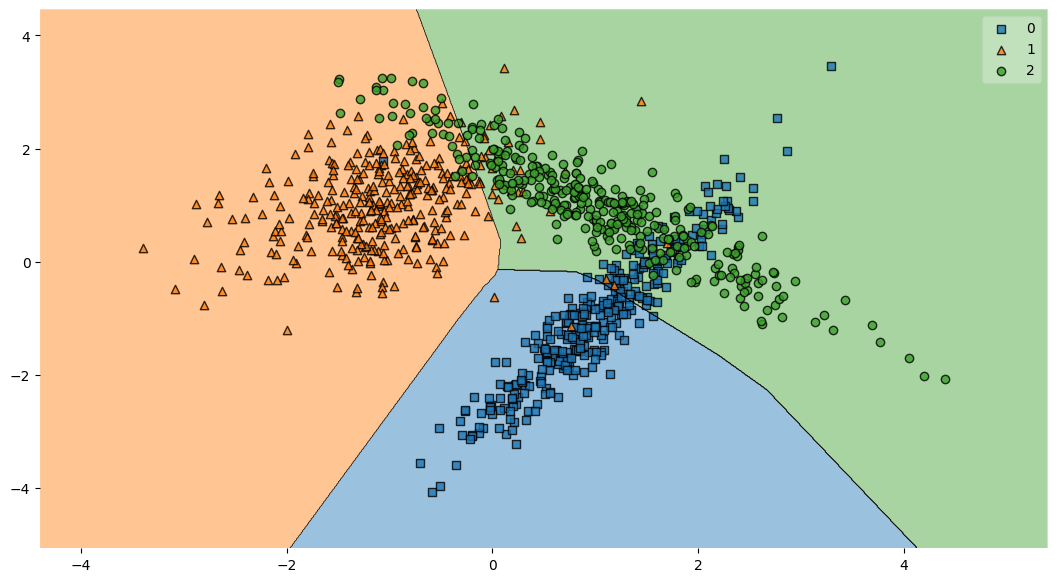

In [23]:
# Wrapper so the model can be used with mlxtend
class KerasClassifierWrapper:
    def __init__(self, model):
        self.model = model

    def predict(self, X):
        pred = self.model.predict(X)
        return np.argmax(pred, axis=1)

# Use the wrapper
wrapped_model = KerasClassifierWrapper(model)

# Plot decision boundary
plt.figure(figsize=(13, 7))
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()

Disadvantage - *Due to the momentum, the optimizer may overshoot a bit, then come back, overshoot again, and oscillate like this many times before stabilizing at the minimum. This is one of the reasons it’s good to have a bit of friction in the system: it gets rid of these oscillations and thus speeds up convergence. But do unnecessary computations which increases the computational complexity.*

---

### Nesterov Accelerated Gradient (NAG)

NAG is a modification to the momentum method that helps accelerate convergence. Instead of calculating the gradient at the current position, it calculates the gradient at the position where the current momentum would take us (a "lookahead" position). This allows the algorithm to correct its course sooner if the momentum is heading towards a bad spot.

**Formula:**

1.  **Lookahead:** Calculate the approximate future position.
    $$ \theta_{approx} = \theta_t - \gamma v_{t-1} $$

2.  **Update Velocity:** Calculate gradient at the lookahead position and update velocity.
    $$ v_t = \gamma v_{t-1} + \eta \nabla J(\theta_{approx}) $$

3.  **Update Parameters:**
    $$ \theta_{t+1} = \theta_t - v_t $$

Where:
*   $\theta$: Parameters (weights)
*   $v$: Velocity (momentum vector)
*   $\gamma$: Momentum coefficient (usually ~0.9)
*   $\eta$: Learning rate
*   $\nabla J$: Gradient of the loss function

In [24]:
# Building Neural Network Architecture
model = Sequential([
    Input(shape = (2,)),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(
    optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

# Training the model
history = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.1138 - loss: 1.4392 - val_accuracy: 0.0450 - val_loss: 1.3160
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0850 - loss: 1.2326 - val_accuracy: 0.0500 - val_loss: 1.1944
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1037 - loss: 1.1657 - val_accuracy: 0.1100 - val_loss: 1.1540
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1825 - loss: 1.1370 - val_accuracy: 0.2750 - val_loss: 1.1316
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3325 - loss: 1.1198 - val_accuracy: 0.3600 - val_loss: 1.1170
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3963 - loss: 1.1085 - val_accuracy: 0.3850 - val_loss: 1.1075
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4350 - loss: 1.1004 - val_accuracy: 0.4250 - val_loss: 1.1005
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4462 - loss: 1.0943 - val_accuracy: 0.4400 - val_loss

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step


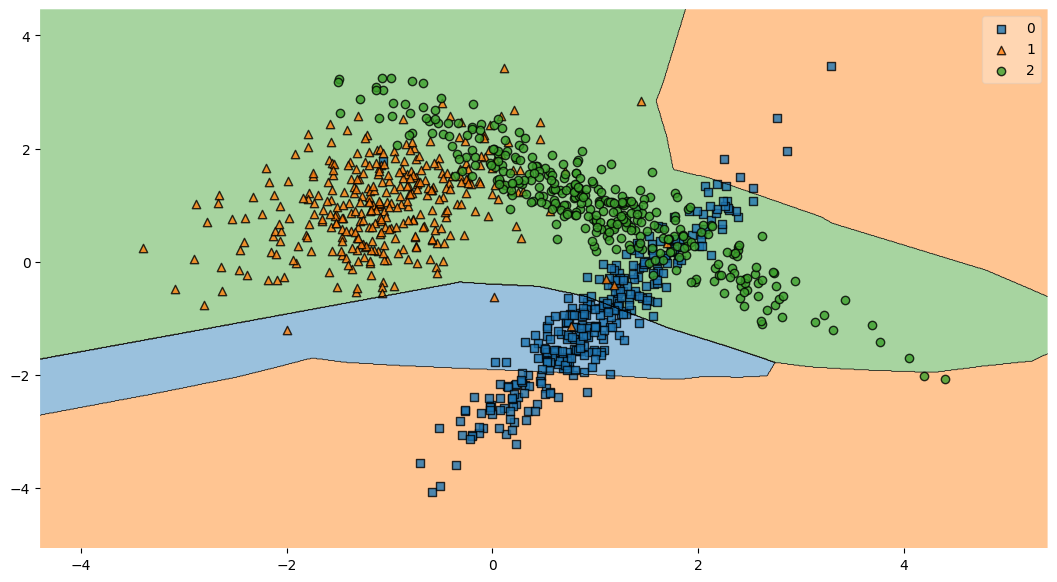

In [32]:
# Use the wrapper
wrapped_model = KerasClassifierWrapper(model)

# Plot decision boundary
plt.figure(figsize=(13, 7))
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()

Disadvantage - *Calculating the gradient at a future point helps reduce shaking, but it can sometimes trap the model in local minima. Although momentum is meant to help escape these traps, if it is too strong, the model might get stuck and be unable to jump out.*

---

#### ADAGrad Optimizer
AdaGrad (Adaptive Gradient Algorithm) scales the learning rate for each parameter based on the history of its gradients. It performs larger updates for infrequent parameters and smaller updates for frequent ones by accumulating the sum of squared gradients.
- **Frequent Parameters:** Parameters that receive non-zero gradients in most iterations (e.g., weights for common features). Their accumulated squared gradients ($v_t$) grow quickly, causing their effective learning rate to decay rapidly.
- **Infrequent Parameters:** Parameters that receive non-zero gradients only occasionally (e.g., weights for rare words). Their $v_t$ remains small, allowing them to maintain a larger effective learning rate for more significant updates when they do appear.

**Optimization Formula:**

1. **Accumulate Squared Gradients:**
   $$v_t = v_{t-1} + g_t^2$$

2. **Update Parameters:**
   $$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{v_t + \epsilon}} \cdot g_t$$

Where:
- $g_t$: Gradient at time step $t$. Why Square? —→ To add the magnitude rather than canceling it by direction (sign -ve and +ve)
- $v_t$: Sum of the squares of the gradients up to time step $t$.
- $\eta$: Initial learning rate.
- $\epsilon$: A small smoothing term (e.g., $10^{-8}$) to avoid division by zero.

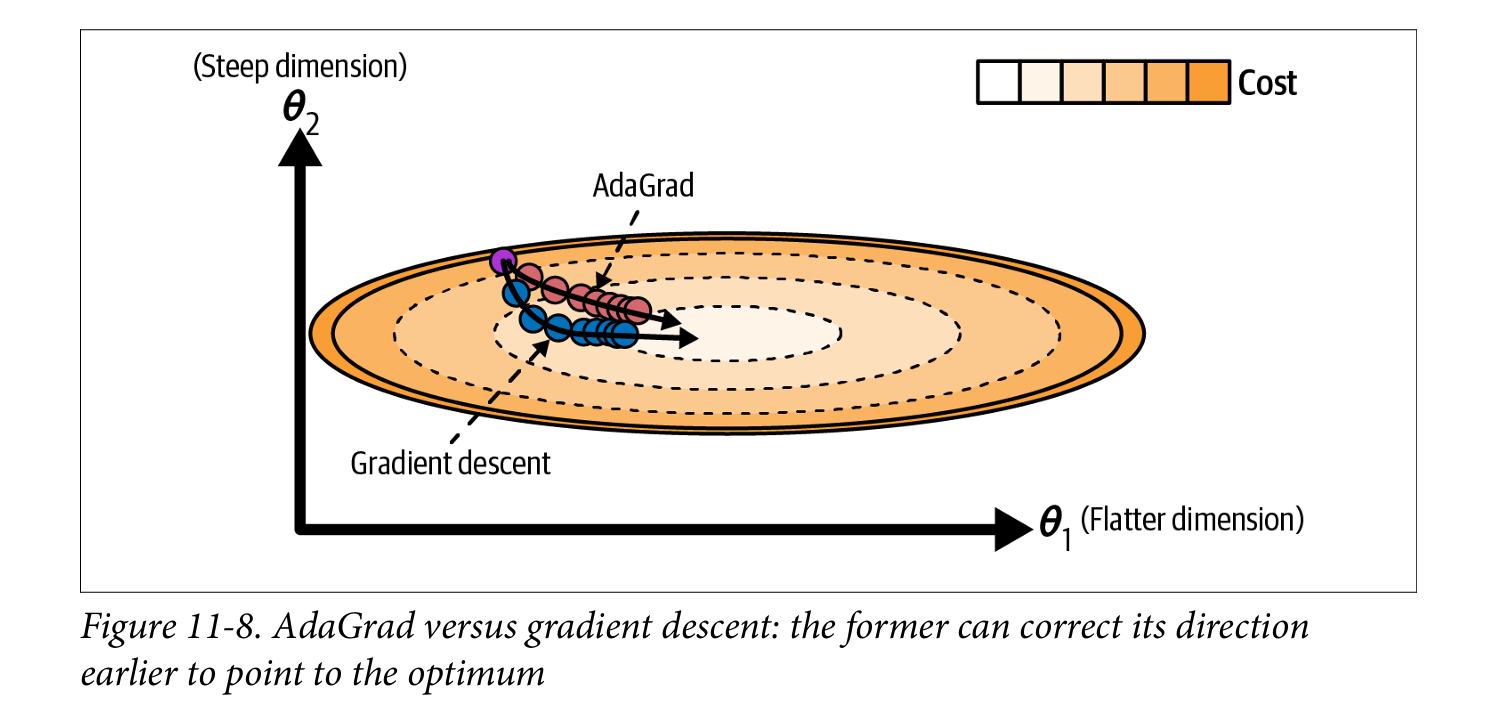

In [5]:
# Building the model architecture
model = Sequential([
    Input(shape=[X_train.shape[1],]),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Compiling with `ADAGrad optimizer`
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adagrad(),
    metrics=["accuracy"]
)

# Training the model
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4938 - loss: 1.0364 - val_accuracy: 0.5200 - val_loss: 1.0333
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5325 - loss: 1.0234 - val_accuracy: 0.5450 - val_loss: 1.0210
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5487 - loss: 1.0125 - val_accuracy: 0.5600 - val_loss: 1.0102
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5675 - loss: 1.0030 - val_accuracy: 0.5800 - val_loss: 1.0007
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5800 - loss: 0.9945 - val_accuracy: 0.6000 - val_loss: 0.9921
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5987 - loss: 0.9868 - val_accuracy: 0.5950 - val_loss: 0.9842
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6112 - loss: 0.9797 - val_accuracy: 0.6050 - val_loss: 0.9769
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6250 - loss: 0.9730 - val_accuracy: 0.6050 - val_loss

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 19s 669us/step


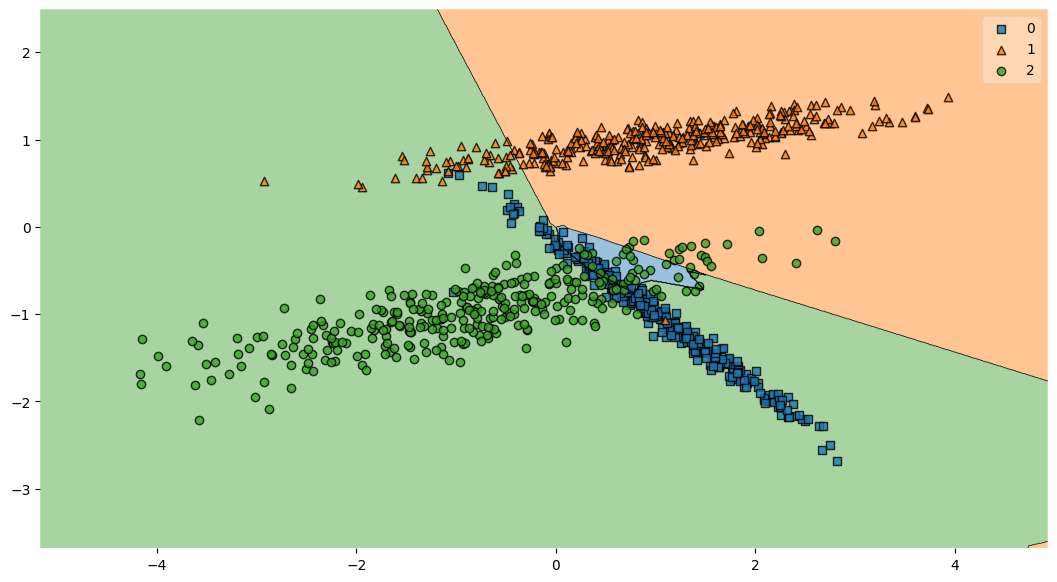

In [9]:
# Plotting the decision boundry
wrapped_model = KerasClassifierWrapper(model)

# Plot decision boundary
plt.figure(figsize=(13, 7))
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()

Disadvantage - *The reason behind the performance is not even good because, it often stops too early when training neural networks: the learning rate gets scaled down so much that the algorithm ends up stopping entirely before reaching the global optimum.*

---

### RMSProp (Root Mean Square Propagation)

RMSProp is an adaptive learning rate method designed to address **Adagrad's** main weakness: the premature and excessive decrease in the learning rate.

#### The Formula
RMSProp updates the parameters using an exponentially weighted moving average of squared gradients:

1. **Update squared gradient average:**
   $$v_t = \beta v_{t-1} + (1 - \beta) g_t^2$$
2. **Update parameters:**
   $$w_{t+1} = w_t - \frac{\eta}{\sqrt{v_t + \epsilon}} g_t$$

Where:
*   $g_t$: Gradient at time $t$.
*   $v_t$: Exponential moving average of squared gradients.
*   $\beta$: Forgetting factor (usually 0.9).
*   $\eta$: Learning rate.
*   $\epsilon$: Small constant to prevent division by zero ($10^{-8}$).

#### How it solves the Adagrad problem?
*   **The Problem in Adagrad:** Adagrad accumulates all past squared gradients from the start of training ($G_t = \sum g_i^2$). Since this sum only increases, the denominator $\sqrt{G_t}$ eventually becomes so large that the learning rate shrinks to nearly zero, causing the model to stop learning before reaching the optimum.
*   **The RMSProp Solution:** Instead of summing all past gradients, RMSProp uses a **decaying average** ($\beta$). This effectively "forgets" gradients from the distant past and keeps the denominator based on a recent window (0.9 —→ previous 10 epochs) of gradients. This prevents the learning rate from vanishing and allows the model to continue learning indefinitely.

In [10]:
# Building the model architecture
model = Sequential([
    Input(shape=[X_train.shape[1],]),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compiling with `ADAGrad optimizer`
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9), # rho —→ beta
    metrics=["accuracy"]
)

# Training the model
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7350 - loss: 0.7708 - val_accuracy: 0.8700 - val_loss: 0.4518
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9062 - loss: 0.3255 - val_accuracy: 0.8600 - val_loss: 0.3008
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9175 - loss: 0.2301 - val_accuracy: 0.9100 - val_loss: 0.2197
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9287 - loss: 0.1879 - val_accuracy: 0.9200 - val_loss: 0.2032
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9300 - loss: 0.1615 - val_accuracy: 0.9300 - val_loss: 0.1725
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9362 - loss: 0.1472 - val_accuracy: 0.9500 - val_loss: 0.1771
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9463 - loss: 0.1350 - val_accuracy: 0.9550 - val_loss: 0.1608
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9550 - loss: 0.1225 - val_accuracy: 0.9650 - val_loss

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 99s 3ms/step


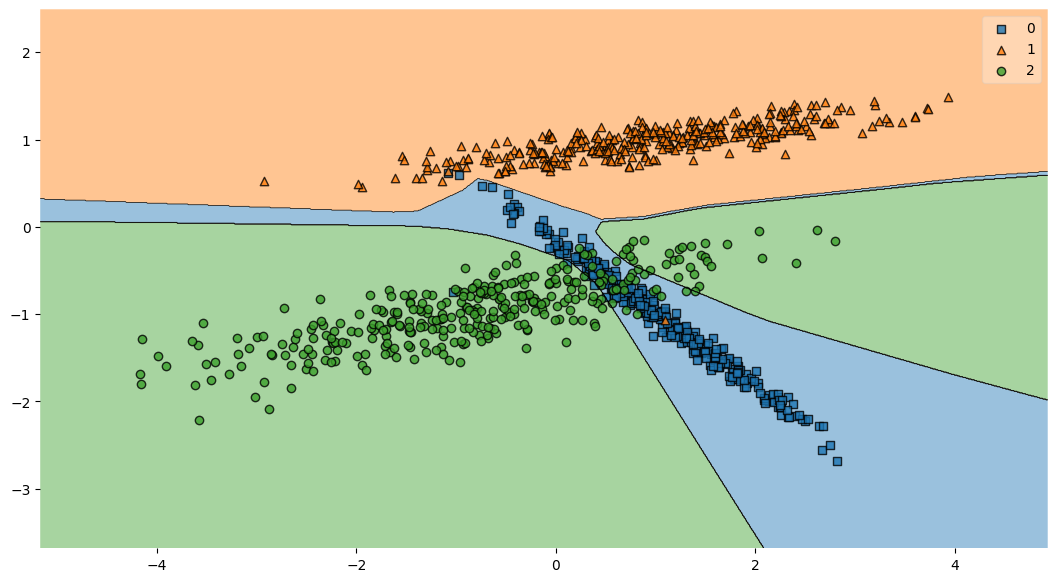

In [12]:
# Plotting the decision boundry
wrapped_model = KerasClassifierWrapper(model)

# Plot decision boundary
plt.figure(figsize=(13, 7))
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()

*See the difference in the performance, This is actually the reason this optimizer does not have any disadvantages at all. Except on very simple problems, this optimizer almost always performs much better than AdaGrad. In fact, it was the preferred optimization algorithm of many researchers until Adam optimization came around.*

---

### Adam Optimizer (Adaptive Moment Estimation)

Adam combines **Momentum** and **RMSprop** to provide an adaptive learning rate for each parameter.

1. **Momentum (First Moment Estimate):** Smooths the gradient updates by keeping a moving average of gradients.
   $$m_t = \beta_1 m_{t-1} + (1 - \beta_1) g_t$$

2. **RMSprop (Second Moment Estimate):** Scales the learning rate by keeping a moving average of squared gradients.
   $$v_t = \beta_2 v_{t-1} + (1 - \beta_2) g_t^2$$

3. **Bias Correction:** Corrects the initialization bias towards zero in early iterations.
   $$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}, \quad \hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

4. **Update Rule:**
   $$w_{t+1} = w_t - \frac{\eta}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t$$

**How it combines them:**
- **Momentum** provides the "direction" ($\hat{m}_t$): It uses the moving average of gradients to maintain direction and overcome noise.
- **RMSprop** provides the "scaling" ($1/\sqrt{\hat{v}_t}$): It divides the learning rate by the square root of the moving average of squared gradients, ensuring that parameters with large gradients have smaller updates and parameters with small gradients have larger updates.

---

#### The need of Bias Correction
##### The Problem: The "Cold Start" of Moving Averages

Adam doesn't use the raw gradient. It uses **exponentially decaying moving averages** of past gradients ($m_t$ for mean, $v_t$ for variance). At the very first step ($t=1$), these averages are initialized to **zero**.

This creates a massive problem: these zero-initialized averages are **heavily biased toward zero** in the first few steps, especially because the decay factors $\beta_1$ and $\beta_2$ (e.g., 0.9, 0.999) are close to 1.

**Without correction, here’s what happens at Step 1:**
*   $m_1 = 0.9 \cdot 0 + 0.1 \cdot \text{Actual Gradient} = 0.1 \cdot \text{Gradient}$ → This is **much smaller** than the true gradient.
*   $v_1 = 0.999 \cdot 0 + 0.001 \cdot \text{Gradient}^2 = 0.001 \cdot \text{Gradient}^2$ → This is **tiny**!
*   The update step $\frac{\eta \cdot m_1}{\sqrt{v_1} + \epsilon}$ becomes a **minuscule fraction** of what it should be. Learning is paralyzed at the very beginning.

##### How Adam Applies This Correction

Adam does the exact same math. It calculates the **bias-corrected** estimates $\hat{m}_t$ and $\hat{v}_t$:

$$\hat{m}_t = \frac{m_t}{1 - \beta_1^t}$$
$$\hat{v}_t = \frac{v_t}{1 - \beta_2^t}$$

Let's see the effect at **$t=1$** with $\beta_1 = 0.9$:
*   Uncorrected: $m_1 = 0.1 \cdot \text{Gradient}$
*   Denominator: $1 - 0.9^1 = 0.1$
*   **Corrected: $\hat{m}_1 = \frac{0.1 \cdot \text{Gradient}}{0.1} = \text{Gradient}$**

**Boom!** The bias correction perfectly undoes the dampening effect of the zero initialization for the first step. As $t$ grows, $\beta^t$ approaches 0, and the correction factor $\frac{1}{1 - \beta^t}$ approaches 1, gracefully turning off the correction once the moving average has enough data.

### Why is This So Important? A Side-by-Side Comparison

| Step | True Gradient | Adam's **Uncorrected** $m_t$ | Adam's **Bias-Corrected** $\hat{m}_t$ | Result |
| :--- | :--- | :--- | :--- | :--- |
| **$t=1$** | 10.0 | $0.9 \cdot 0 + 0.1 \cdot 10 = 1.0$ | $\frac{1.0}{1 - 0.9} = 10.0$ | **Without correction:** Update is 10x too small.<br>**With correction:** Update uses the true scale. |
| **$t=10$** | 10.0 | $\approx 6.5$ | $\frac{6.5}{0.65} \approx 10.0$ | Correction still ensures the scale is right. |
| **$t=1000$** | 10.0 | $\approx 10.0$ | $\frac{10.0}{0.9999} \approx 10.0$ | Correction is essentially 1 (turned off). |

### The Consequences of Skipping Bias Correction

If you used raw $m_t$ and $v_t$ (no correction):
1.  **Early Updates Are Tiny**: The network learns **extremely slowly** in the first ~100 steps, wasting computation.
2.  **Requires Higher $\eta$**: You might try to compensate by cranking up the learning rate $\eta$, but then later in training when the bias is gone, it will be too high and cause instability.
3.  **Poor Reproducibility**: The warm-up period becomes a weird, unstable phase of training.

In [13]:
# Building the model architecture
model = Sequential([
    Input(shape=[X_train.shape[1],]),
    Dense(units = 15, activation = 'relu'),
    Dense(units = 10, activation = 'relu'),
    Dense(units = 5, activation = 'relu'),
    Dense(units = 3, activation = 'softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 15)             │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 278 (1.09 KB)

 Trainable params: 278 (1.09 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Compiling with `Adam optimizer`
model.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999), # beta_1 —→ momentum decay | beta_2 —→ learning rate decay
    metrics=["accuracy"]
)

# Training the model
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.4538 - loss: 0.9754 - val_accuracy: 0.6200 - val_loss: 0.6719
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6662 - loss: 0.5132 - val_accuracy: 0.6950 - val_loss: 0.3710
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9112 - loss: 0.3099 - val_accuracy: 0.9250 - val_loss: 0.2479
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9287 - loss: 0.2231 - val_accuracy: 0.9200 - val_loss: 0.2236
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9312 - loss: 0.1974 - val_accuracy: 0.9250 - val_loss: 0.2177
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9350 - loss: 0.1864 - val_accuracy: 0.9200 - val_loss: 0.2098
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9312 - loss: 0.1831 - val_accuracy: 0.9500 - val_loss: 0.1993
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9488 - loss: 0.1560 - val_accuracy: 0.9500 - val_l

28438/28438 ━━━━━━━━━━━━━━━━━━━━ 65s 2ms/step


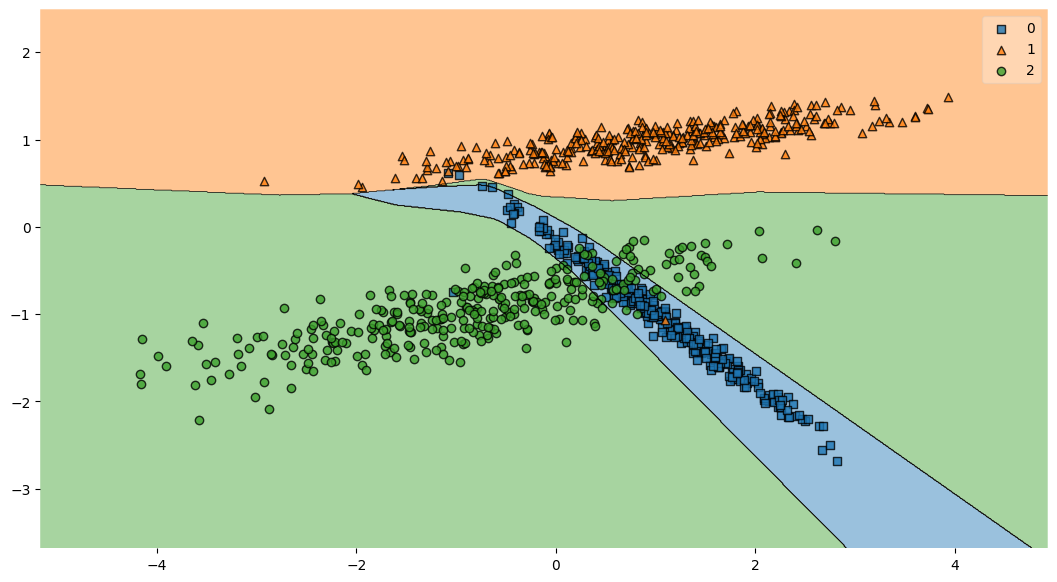

In [16]:
# Plotting the decision boundry
wrapped_model = KerasClassifierWrapper(model)

# Plot decision boundary
plt.figure(figsize=(13, 7))
plot_decision_regions(X=X, y=y, clf=wrapped_model)
plt.show()